Abstract : 
The goal of this assignment is to predict the tensile strength of steel based on their specific attributes (features) using any two regression models. The regression  models that are going to be used are : 


➔ Linear regression 

➔ K- Nearest Neighbor Regression

### Machine learning package used : Scikit Learn 
Scikit learn is a open source machine learning library which mainly provides supervised learning algorithms. We are using this package because it is firstly built on technologies like Numpy, pandas and matplotlib. Secondly building an algorithm from scratch is not at all an easy task. Scikit learn provides us necessary algorithms with very good efficiency and with the reliability we need [6]. 
### Data preparation 
We firstly import the necessary libraries to get the dataset and we import the dataset – “steet.csv” which was primarily converted from “steel.txt”. Our next step would be to segregate the data into two parts, features and targets. In our program we store the segregated values X as features and y as targets. We later use MinMaxScaler library to scale all the values of the dataset from 0 to 1. We do it by subtracting the minimum value in the dataset and divide it by its range [8]. We scale the data to keep all the values similar. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("steel.csv")
dataset = dataset.drop(["sample"],axis =1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(dataset)
df_features1 = pd.DataFrame(data)
df_features1.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.068966,0.425710,0.214416,0.380952,0.991453,0.265432,0.0,0.496337,0.0,0.027822
1,0.000000,1.000000,0.425710,0.445391,0.952381,0.991453,0.265432,0.0,0.496337,0.0,0.288151
2,0.000000,0.206897,0.425710,0.834977,0.095238,0.991453,0.265432,0.0,0.496337,0.0,0.066579
3,0.000000,0.931034,0.425710,0.061242,0.047619,0.991453,0.265432,0.0,0.496337,0.0,0.186174
4,0.014384,0.931034,0.451864,0.277040,0.904762,0.726496,0.423457,0.0,0.601648,0.0,0.227516


In [3]:
X = np.array(df_features1.drop([10], axis = 1))
y= dataset.iloc[:,10].values

### Splitting Dataset : 
Using the scikit learn library we have divided the dataset into two, training set and testing set. We have divided and maintained a threshold for testing set as 1/3rd  and training set as 2/3rd  of the overall dataset.  

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25)

### Reasons why we are going to use these both regressors.  
Linear regression basically models the relationships between a dependent variable and one or more independent variables [1]. In our dataset, our task is to predict the tensile strength. However, the values of the tensile strength are not same always, it differs to every feature of the dataset. Each features defines some specific tensile strength. Linear regression will help us to determine the relationship between each feature with their independent tensile strengths.  
 K- Nearest Neighbor Regression basically groups the dependent variables with the help of their weights which contribute to their neighbors, so that the nearest neighbor assigned contributes more to the depended variable than the other variables which are far from it [2]. 

### Linear Regression : 
Linear regression is a regression model where the dependent variables depend on the unknown independent variables. This type of algorithm fits well on the datasets where the features are not linearly related to targets and it makes the regressor analyze our dataset and learn from it [1]. To analyze the data we use the following linear equation.  
        
        
        𝑦 = 𝑏0 + 𝑏1 ∗ 𝑋 + ⋯ 
        
        
Where [3] ,  y -> Dependent Variable 𝑏0 -> Constant (The point where it crosses the y-axis on a graph) 𝑏1 -> Coefficient for Independent Variable X -> Independent variable (Causes the depended variable to change) When the coefficients b1,b2,.. shows that data is likely to be able to predict future outcomes and scatter plot of our data we get a straight line. And hence we use linear regression to get predictive results [9]. 
 

In [9]:
# Fitting Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the score of the Test set results
score_1 = regressor.score(X_test, y_test)
# Predicting the Test set results
y_pred1 = regressor.predict(X_test)
score_1

0.8008011964384181

### K Nearest Neighbor Regressor : 
Firstly we choose the best number of neighbor which is suitable to our dataset. In regression, number of k does not matter, as it does not contribute any confidence to some specific class. KNN is an algorithm where it stores all the available features and predicts the numerical target based on distance function. So first after taking the number of K , we take each data point in the features.  
How Euclidean distance works in knn: Let us consider A and B are the represented feature vectors, where A = (𝑥1,𝑥2,𝑥3,..) B = (𝑦1,𝑦2,𝑦3,..), where k is the dimensionality of the feature space [4]. Now to calculate the distance between the new point and k neighbor we use the normalized Euclidean distance equation [5]. 


### 𝐸𝑢𝑐𝑙𝑖𝑑𝑒𝑎𝑛 𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒 (𝐴,𝐵) = √∑(𝑥𝑖 − 𝑦𝑖)2 𝑘 𝑖=1
 
Using scikit learn we import k nearest neighbor regressor model. We assign the number of neighbors to the knn model. We choose number of neighbors large enough so that the noise in the data is minimized and small enough so that the samples of other targets are not included. In our case we have almost all different targets, so we chose the k value such that it is neither large nor small. Later we fit the model with the training and testing sets. After that we calculate the accuracy score for the fitted model.  
 

In [10]:
# Fitting K Nearest Neighbors Regressor to the dataset
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)
score_2 = knn_reg.score(X_test, y_test)
# Predicting the Test set results
y_pred2 = knn_reg.predict(X_test)
score_2

0.7408178966624688

### Performance evaluation  
Using scikit learn library we evaluate the performance of our both models (Linear regression and KNN regression). We use sklearn’s metrics to find both the RMSE – Root mean squared error and R2. The RMSE is the square root of the variance between the observed value of dependent variable y and the predicted values of y. [7] It shows the absolute fit of the model to the data that how close the observed data points are to the model’s predicted values. In regression problems when we call for score of the regressor model, in the background it calls the R2 . In our model we have predicted both the score and R2 and we have same results for both. 

In [11]:
from sklearn.metrics import mean_squared_error,r2_score
rmse1 = np.sqrt(mean_squared_error(y_test,y_pred1))
rmse2 = np.sqrt(mean_squared_error(y_test,y_pred2))
r2_1 = r2_score(y_test,y_pred1)
r2_2 = r2_score(y_test,y_pred2)
print(rmse1,rmse2,r2_1,r2_2)

41.76984118104712 47.64550847886896 0.8008011964384181 0.7408178966624688


### Conclusion, results and observation : 

Finally to recapitulate, we built two regression models using scikit learn machine learning package. Those are Linear regression and K-Nearest Neighbor regression( with n_neighbors = 3). We observe that the linear model performs better than the knn regressor model and their scores are 80% and 74% respectively. We also observe that the RMSE- root mean score error of linear regression is 41.77 which is comparatively less than the knn model which resulted to be 47.65. Therefore for this dataset linear regression fits better than knn model. The reason why the linear regressor fits better is that, the linear regressor bounds to 
connect each dependent variable with its unknown independent variable. The linear regressor resulted to best in connecting its features to their specific tensile strength of the steel. 
 

In [12]:
print("The accuracy score of linear regression : %.2f" %score_1)
print("Root mean squared error of linear regression: %.2f" %rmse1)
print("Variance score of linear regression : %.2f" %r2_1)
print("------------------------------------------------------")
print("The accuracy score of knn regression : %.2f" %score_2)
print("Root mean squared error of knn regression: %.2f" %rmse2)
print("Variance score of Knn regression : %.2f" %r2_2)

The accuracy score of linear regression : 0.80
Root mean squared error of linear regression: 41.77
Variance score of linear regression : 0.80
------------------------------------------------------
The accuracy score of knn regression : 0.74
Root mean squared error of knn regression: 47.65
Variance score of Knn regression : 0.74


As our both models overfit, we plotted a graph where it displays the performance of both (LR and KNN) model. The plot consists of the accuracy of the model versus the number of iterations. We assigned number of folds to be 5. The result is same here too, the linear regressor model has better predictions than the KNN model. During to overfit, the KNN regressor does not predict well, whereas linear regressor does to some extent. Below there are two other plots, where red regression line is drawn. However we can see that linear model fits better than KNN model as the points fall almost near to the regression line. 

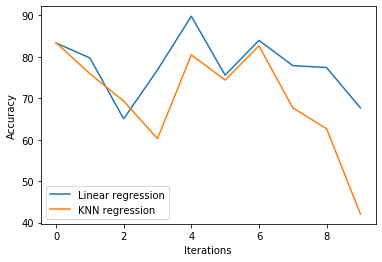

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv1 = cross_val_score(estimator=regressor , X = X_train, y= y_train, cv=10)
cv2 = cross_val_score(estimator=knn_reg , X = X_train, y= y_train, cv=10)
plt.plot(range(10), cv1*100, label ="Linear regression")
plt.plot(range(10), cv2*100, label ="KNN regression")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

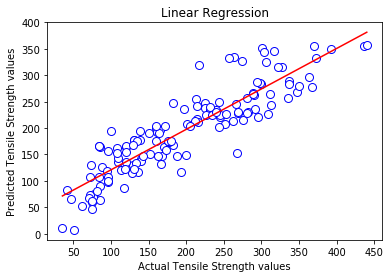

In [14]:
import numpy as np
plt.figure()
plt.plot(y_test, y_pred1, 'o', MarkerEdgeColor='b', MarkerFaceColor = 'w', markersize = 8 )
plt.title('Linear Regression')
plt.xlabel('Actual Tensile Strength values')
plt.ylabel('Predicted Tensile Strength values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred1, 1))(np.unique(y_test)), color = 'red')
plt.show()

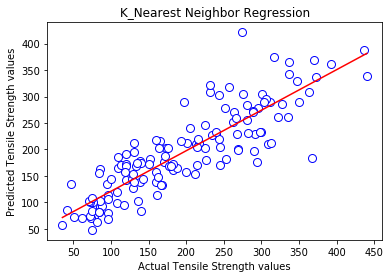

In [15]:
plt.figure()
plt.plot(y_test, y_pred2, 'o', MarkerEdgeColor='b', MarkerFaceColor = 'w', markersize = 8 )
plt.title('K_Nearest Neighbor Regression')
plt.xlabel('Actual Tensile Strength values')
plt.ylabel('Predicted Tensile Strength values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred1, 1))(np.unique(y_test)), color = 'red')
plt.show()

References  
[1] https://en.wikipedia.org/wiki/Linear_regression 

[2] https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

[3] https://github.com/waseemshariff126/Linear-Regression-model 

[4] https://elitedatascience.com/overfitting-in-machine-learning 

[5] https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/ 

[6] https://www.codecademy.com/articles/scikit-learn 

[7] https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/ 

[8] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

[9] https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/regression-analysis/find-a-linearregression-equation/ 